In [25]:
import pandas as pd

df = pd.read_csv('titanic.csv')

In [26]:
# 결측치 확인
print(df.isnull().sum())

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Embarked    0
Survived    0
dtype: int64


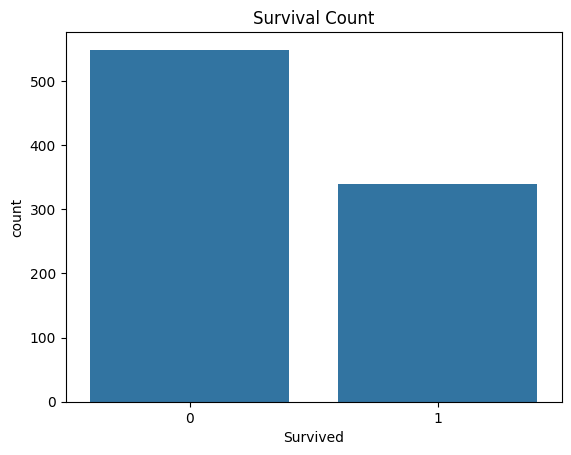

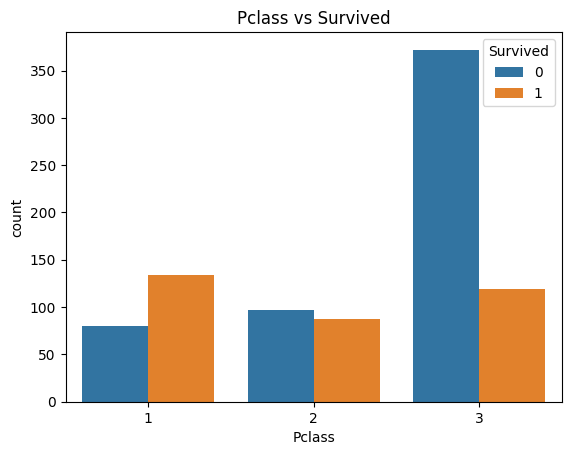

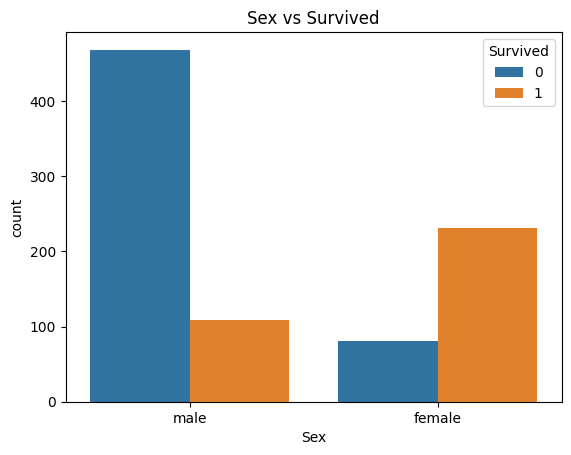

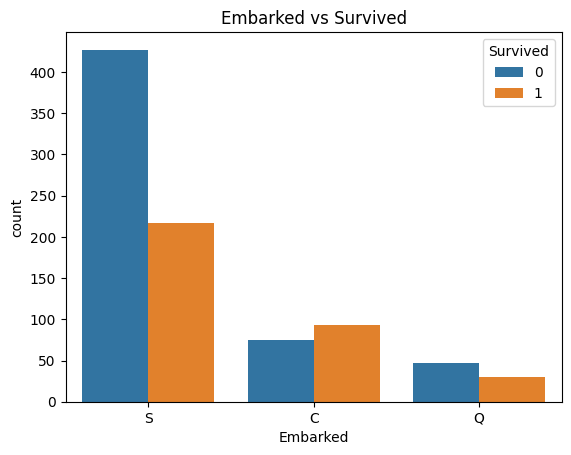

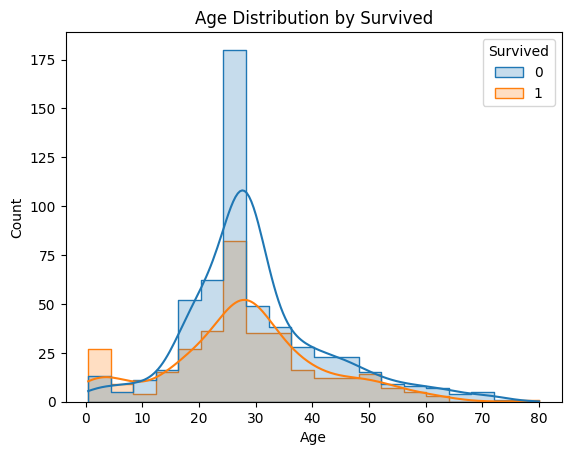

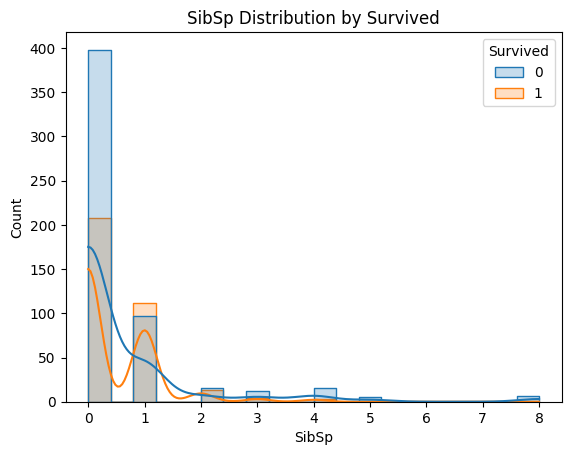

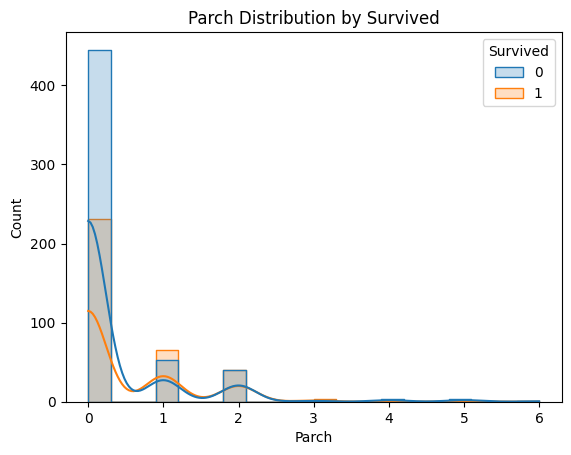

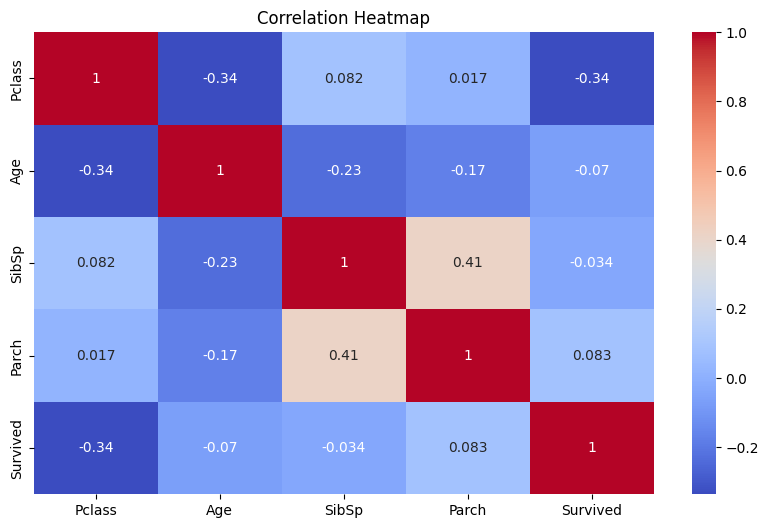

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# 범주형 변수와 Survived의 관계
categorical = ['Pclass', 'Sex', 'Embarked']

for col in categorical:
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f'{col} vs Survived')
    plt.show()

numerical = ['Age', 'SibSp', 'Parch']

for col in numerical:
    sns.histplot(data=df, x=col, hue='Survived', bins=20, kde=True, element='step')
    plt.title(f'{col} Distribution by Survived')
    plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# 전처리

df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [29]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

In [30]:
# Train/Test 분할

from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# KNN 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)

In [33]:
# Logistic Regression 학습
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_preds = logreg.predict(X_test_scaled)

In [34]:
# 성능 비교
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, knn_preds)
logreg_acc = accuracy_score(y_test, logreg_preds)

print(f"KNN 정확도: {knn_acc:.4f}")
print(f"Logistic Regression 정확도: {logreg_acc:.4f}")

KNN 정확도: 0.7809
Logistic Regression 정확도: 0.7753


KNN은 결정경계가 선형이 아닌 지역적으로 모여있는 비선형구조 분류를 잘하기때문에 단순한 선형분류인 logistic 회귀분류보다 더 잘 나올 수 있다!